<a href="https://colab.research.google.com/github/amrutha-m-sajeev/NLP/blob/main/sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re #regular expression(used for removing special character)
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
df1=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')


In [ ]:
df

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df2=pd.concat([df,df1],axis=0)
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df2.drop(['S. No.'],axis=1,inplace=True)
df2

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam
...,...,...
952,hows my favourite person today? r u workin har...,Non-Spam
953,How much you got for cleaning,Non-Spam
954,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,Wat time ü finish?,Non-Spam


In [ ]:
df2.reset_index(drop=True,inplace=True)
df2

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam
...,...,...
1077,hows my favourite person today? r u workin har...,Non-Spam
1078,How much you got for cleaning,Non-Spam
1079,Sorry da. I gone mad so many pending works wha...,Non-Spam
1080,Wat time ü finish?,Non-Spam


<Axes: xlabel='Label', ylabel='count'>

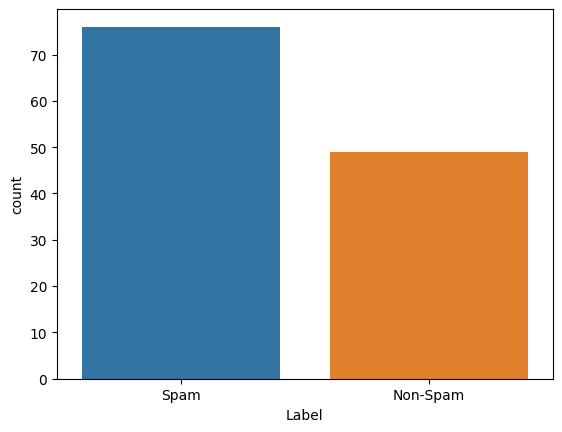

In [ ]:
sns.countplot(data=df,x='Label')

In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df2.sample(5)

,Message_body,Label
514,"Hi hope u r both ok, he said he would text and...",Non-Spam
822,1. Tension face 2. Smiling face 3. Waste face ...,Non-Spam
1070,"Received, understood n acted upon!",Non-Spam
660,Hey... Very inconvenient for your sis a not huh?,Non-Spam
1046,Are you planning to come chennai?,Non-Spam


In [ ]:
df2['Label']=df2['Label'].map({'Non-Spam':1,'Spam':-1})
df2

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",-1
1,"Loan for any purpose £500 - £75,000. Homeowner...",-1
2,Congrats! Nokia 3650 video camera phone is you...,-1
3,URGENT! Your Mobile number has been awarded wi...,-1
4,Someone has contacted our dating service and e...,-1
...,...,...
1077,hows my favourite person today? r u workin har...,1
1078,How much you got for cleaning,1
1079,Sorry da. I gone mad so many pending works wha...,1
1080,Wat time ü finish?,1


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
tweet=df2.Message_body
tweet

0       UpgrdCentre Orange customer, you may now claim...
1       Loan for any purpose £500 - £75,000. Homeowner...
2       Congrats! Nokia 3650 video camera phone is you...
3       URGENT! Your Mobile number has been awarded wi...
4       Someone has contacted our dating service and e...
                              ...                        
1077    hows my favourite person today? r u workin har...
1078                        How much you got for cleaning
1079    Sorry da. I gone mad so many pending works wha...
1080                                   Wat time ü finish?
1081                      Just glad to be talking to you.
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0       UpgrdCentre Orange customer , you may now clai...
1       Loan for any purpose £ 500 - £ 75,000 . Homeow...
2       Congrats ! Nokia 3650 video camera phone is yo...
3       URGENT ! Your Mobile number has been awarded w...
4       Someone has contacted our dating service and e...
                              ...                        
1077    hows my favourite person today ? r u workin ha...
1078                        How much you got for cleaning
1079    Sorry da . I gone mad so many pending works wh...
1080                                  Wat time ü finish ?
1081                     Just glad to be talking to you .
Name: Message_body, Length: 1082, dtype: object

In [ ]:
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-17-8bdf2b3e6acb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')


0       UpgrdCentre Orange customer you may now claim ...
1       Loan for any purpose 500 75 000 Homeowners Ten...
2       Congrats Nokia 3650 video camera phone is your...
3       URGENT Your Mobile number has been awarded wit...
4       Someone has contacted our dating service and e...
                              ...                        
1077    hows my favourite person today r u workin hard...
1078                        How much you got for cleaning
1079    Sorry da I gone mad so many pending works what...
1080                                     Wat time finish 
1081                      Just glad to be talking to you 
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweet

0       upgrdcentr orang custom you may now claim your...
1       loan for ani purpos 500 75 000 homeown tenant ...
2       congrat nokia 3650 video camera phone is your ...
3       urgent your mobil number has been award with a...
4       someon has contact our date servic and enter y...
                              ...                        
1077    how my favourit person today r u workin hard c...
1078                           how much you got for clean
1079     sorri da i gone mad so mani pend work what to do
1080                                      wat time finish
1081                          just glad to be talk to you
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweet=tweet.apply(lambda x : [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x: " ".join(x))
tweet

0       upgrdcentr orang custom may claim free camera ...
1       loan ani purpos 500 75 000 homeown tenant welc...
2       congrat nokia 3650 video camera phone call 090...
3       urgent mobil number award 2000 prize guarante ...
4       someon contact date servic enter phone becaus ...
                              ...                        
1077    favourit person today r u workin hard sleep la...
1078                                       much got clean
1079                     sorri da gone mad mani pend work
1080                                      wat time finish
1081                                            glad talk
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
train_data=vector.fit_transform(tweet)
print(train_data)

  (0, 532)	0.23778745996856487
  (0, 1951)	0.23778745996856487
  (0, 483)	0.20134769731822458
  (0, 1533)	0.2627559217895887
  (0, 180)	0.2627559217895887
  (0, 1037)	0.1953300957872066
  (0, 1922)	0.2085762322365913
  (0, 370)	0.2627559217895887
  (0, 144)	0.2627559217895887
  (0, 3)	0.24815030792360188
  (0, 687)	0.10920619562728497
  (0, 1678)	0.24815030792360188
  (0, 2778)	0.24815030792360188
  (0, 2022)	0.16177362163121398
  (0, 694)	0.19017533493524427
  (0, 1189)	0.1384808980471328
  (0, 777)	0.15965407643279633
  (0, 1733)	0.20134769731822458
  (0, 881)	0.17324492246053047
  (0, 1955)	0.21281899814754107
  (0, 2779)	0.2627559217895887
  (1, 547)	0.16080892180797837
  (1, 2628)	0.14891618303657989
  (1, 155)	0.261189037221211
  (1, 20)	0.22837935279959556
  :	:
  (1077, 1122)	0.3567556532135045
  (1077, 2927)	0.3369249476680099
  (1077, 1859)	0.3369249476680099
  (1077, 1330)	0.3228548381680156
  (1077, 1886)	0.28319342707702644
  (1077, 207)	0.2954848482792756
  (1077, 2419)	0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,df2['Label'],test_size=0.30,random_state=42)
x_train

<757x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 6725 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
k_model=KNeighborsClassifier(n_neighbors=7)
nb_model=MultinomialNB()
sv_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier()
model=[k_model,nb_model,sv_model,d_model,r_model]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[ 39  19]
 [  2 265]]
0.9353846153846154
              precision    recall  f1-score   support

          -1       0.95      0.67      0.79        58
           1       0.93      0.99      0.96       267

    accuracy                           0.94       325
   macro avg       0.94      0.83      0.87       325
weighted avg       0.94      0.94      0.93       325

****************************************************************************************************
[[ 37  21]
 [  0 267]]
0.9353846153846154
              precision    recall  f1-score   support

          -1       1.00      0.64      0.78        58
           1       0.93      1.00      0.96       267

    accuracy                           0.94       325
   macro avg       0.96      0.82      0.87       325
weighted avg       0.94      0.94      0.93       325

****************************************************************************************************
[[ 35  23]
 [  0 267]]
0.9292307692307692
              prec